# Initial Schedule 

Friday, 02.10.2020 (set up and get basic understanding)
+ set up the working environment (github, notebook etc.)
- reading into the topic, achieve basic understanding
- doing research, getting knowledge on google
- have a look into the data, understand the dataset
- start the cleaning process

Monday, 05.10.2020 (Finish the data exploration and find hypotheses)
- formulating questions & hypothesis to work on
- finish cleaning
- Review with coaches at 2.20 - 2.40 pm
- gathering most import information
- explore data by visualization, draw plots

Tuesday, 06.10.2020 (Predicition Modeling)
- create prediction models (at least 3) with optimal parameters
- create new features

Wednesday, 07.10.2020 (Summing up the results, preparing deliverables)
- prepare final visualization

Thursay, 08.10.2020 - emergency buffer



## Deliverables 

Deadline: 08.10.2020, 11:00
- slides presentation (for non technical stake holders)
- PEP8 jupyternotebook on github

## Things to remember 

- Data Science Life Cycle

## Notes 

- age, gender, education, country, ethnicity: transform age to absolute values classes
- is there a correlation between the usage of "soft drugs" to "hard drugs" (soft: choc, caff, alc, cigarettes)
- in case one is using at least one drug, is it more likely that he'll use other drugs as well
- create a feature the stats if someone is probably addicted 



****

# Loading the data 

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
cd ..

/Users/David/nf-sep-20/Projects/Project2_Predictions_Drugs


In [21]:
original_data = pd.read_excel("PersonalityvsDrugUse/drug_consumption.xls")
original_data.head().T

general_data = ["Age", "Gender", "Education", "Country", "Ethnicity"]
psychometrics = ["NScore", "EScore", "AScore", "CScore", "OScore", "Impulsive", "SS"]

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1885.0,945.294960,545.167641,1.00000,474.00000,946.00000,1417.00000,1888.00000
Age,1885.0,0.034610,0.878360,-0.95197,-0.95197,-0.07854,0.49788,2.59171
Gender,1885.0,-0.000256,0.482588,-0.48246,-0.48246,-0.48246,0.48246,0.48246
Education,1885.0,-0.003806,0.950078,-2.43591,-0.61113,-0.05921,0.45468,1.98437
Country,1885.0,0.355542,0.700335,-0.57009,-0.57009,0.96082,0.96082,0.96082
Ethnicity,1885.0,-0.309577,0.166226,-1.10702,-0.31685,-0.31685,-0.31685,1.90725
Nscore,1885.0,0.000047,0.998106,-3.46436,-0.67825,0.04257,0.62967,3.27393
Escore,1885.0,-0.000163,0.997448,-3.27393,-0.69509,0.00332,0.63779,3.27393
Oscore,1885.0,-0.000534,0.996229,-3.27393,-0.71727,-0.01928,0.72330,2.90161
Ascore,1885.0,-0.000245,0.997440,-3.46436,-0.60633,-0.01729,0.76096,3.46436


In [22]:
df = original_data.copy()

In [34]:
df.Age = df.Age.astype(str)
age_dict = {
            "-0.95197" : "18-24",
            "-0.07854" : "25-34",
            "0.49788" : "35-44", 
            "1.09449" : "45-54",
            "1.82213" : "55-64",
            "2.59171" : "65+" 
            }

df.Age = df.Age.replace(age_dict)
df.Age.head()

0    35-44
1    25-34
2    35-44
3    18-24
4    35-44
Name: Age, dtype: object

In [46]:
df.Gender = df.Gender.astype(str)
gender_dict = {"0.48246" : "Female", "-0.48246":"Male"}
df["Gender"] = df.Gender.replace(gender_dict)
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [44]:
df.Education = df.Education.astype(str)
Education_dict = {
            '-2.43591' : 'Left school before 16 years',
            '-1.7379' : 'Left school at 16 years ',
            '-1.43719' : 'Left school at 17 years' ,
            '-1.22751' : 'Left school at 18 years ',
            '-0.61113' : 'Some college or university, no certificate or degree' ,
            '-0.05921' : 'Professional certificate/ diploma' ,
            '0.45468' : 'University degree' ,
            '1.16365' : 'Masters degree' ,
            '1.98437' : 'Doctorate degree' 
            }

df.Education = df.Education.replace(Education_dict)
df.Education.unique()

array(['Professional certificate/ diploma', 'Doctorate degree',
       'Masters degree', 'Left school at 18 years ',
       'Left school at 16 years ', 'University degree',
       'Some college or university, no certificate or degree',
       'Left school before 16 years', 'Left school at 17 years'],
      dtype=object)

In [43]:
df.Country = df.Country.astype(str)
Country_dict = {
            '-0.09765' : 'Australia',
            '0.24923' : 'Canada' ,
            '-0.46841' : 'New Zealand',
            '-0.28519' : 'Other',
            '0.21128' : 'Republic of Ireland',
            '0.96082' : 'UK',
            '-0.57009' : 'USA' 
            }

df.Country = df.Country.replace(Country_dict)
df.Country.unique()

array(['UK', 'Canada', 'USA', 'Other', 'Australia', 'Republic of Ireland',
       'New Zealand'], dtype=object)

In [47]:
df.Ethnicity = df.Ethnicity.astype(str)
Ethnicity_dict = {
            '-0.50212': 'Asian' ,
            '-1.10702' : 'Black' ,
            '1.90725' : 'Mixed-Black/Asian' ,
            '0.126' : 'Mixed-White/Asian' ,
            '-0.22166' : 'Mixed-White/Black' ,
            '0.1144' : 'Other' ,
            '-0.31685' : 'White' 
            }

df.Ethnicity = df.Ethnicity.replace(Ethnicity_dict)
df.Ethnicity.unique()

array(['Mixed-White/Asian', 'White', 'Other', 'Mixed-White/Black',
       'Asian', 'Black', 'Mixed-Black/Asian'], dtype=object)

In [48]:
df.head().T

,0,1,2,3,4
ID,1,2,3,4,5
Age,35-44,25-34,35-44,18-24,35-44
Gender,Female,Male,Male,Female,Female
Education,Professional certificate/ diploma,Doctorate degree,Professional certificate/ diploma,Masters degree,Doctorate degree
Country,UK,UK,UK,UK,UK
Ethnicity,Mixed-White/Asian,White,White,White,White
Nscore,0.31287,-0.67825,-0.46725,-0.14882,0.73545
Escore,-0.57545,1.93886,0.80523,-0.80615,-1.6334
Oscore,-0.58331,1.43533,-0.84732,-0.01928,-0.45174
Ascore,-0.91699,0.76096,-1.6209,0.59042,-0.30172


In [85]:
#check for duplicats
df.ID.duplicated().sum()


0

In [88]:
# there is no use for the id column, so we drop it entirely
df.drop(columns="ID", inplace=True)

KeyError: "['ID'] not found in axis"

In [89]:
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,25-34,Male,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,35-44,Male,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,18-24,Female,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,35-44,Female,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [68]:
missing = pd.DataFrame(df.isnull().sum(),columns=['Number'])
missing['Percentage'] = round(missing.Number/df.shape[0]*100,1)
missing[missing.Number!=0]
df2 = pd.DataFrame()
df2["Age"] = df.Age
df2["Gender"] = df.Gender
df2.head()

,Age,Gender
0,35-44,Female
1,25-34,Male
2,35-44,Male
3,18-24,Female
4,35-44,Female


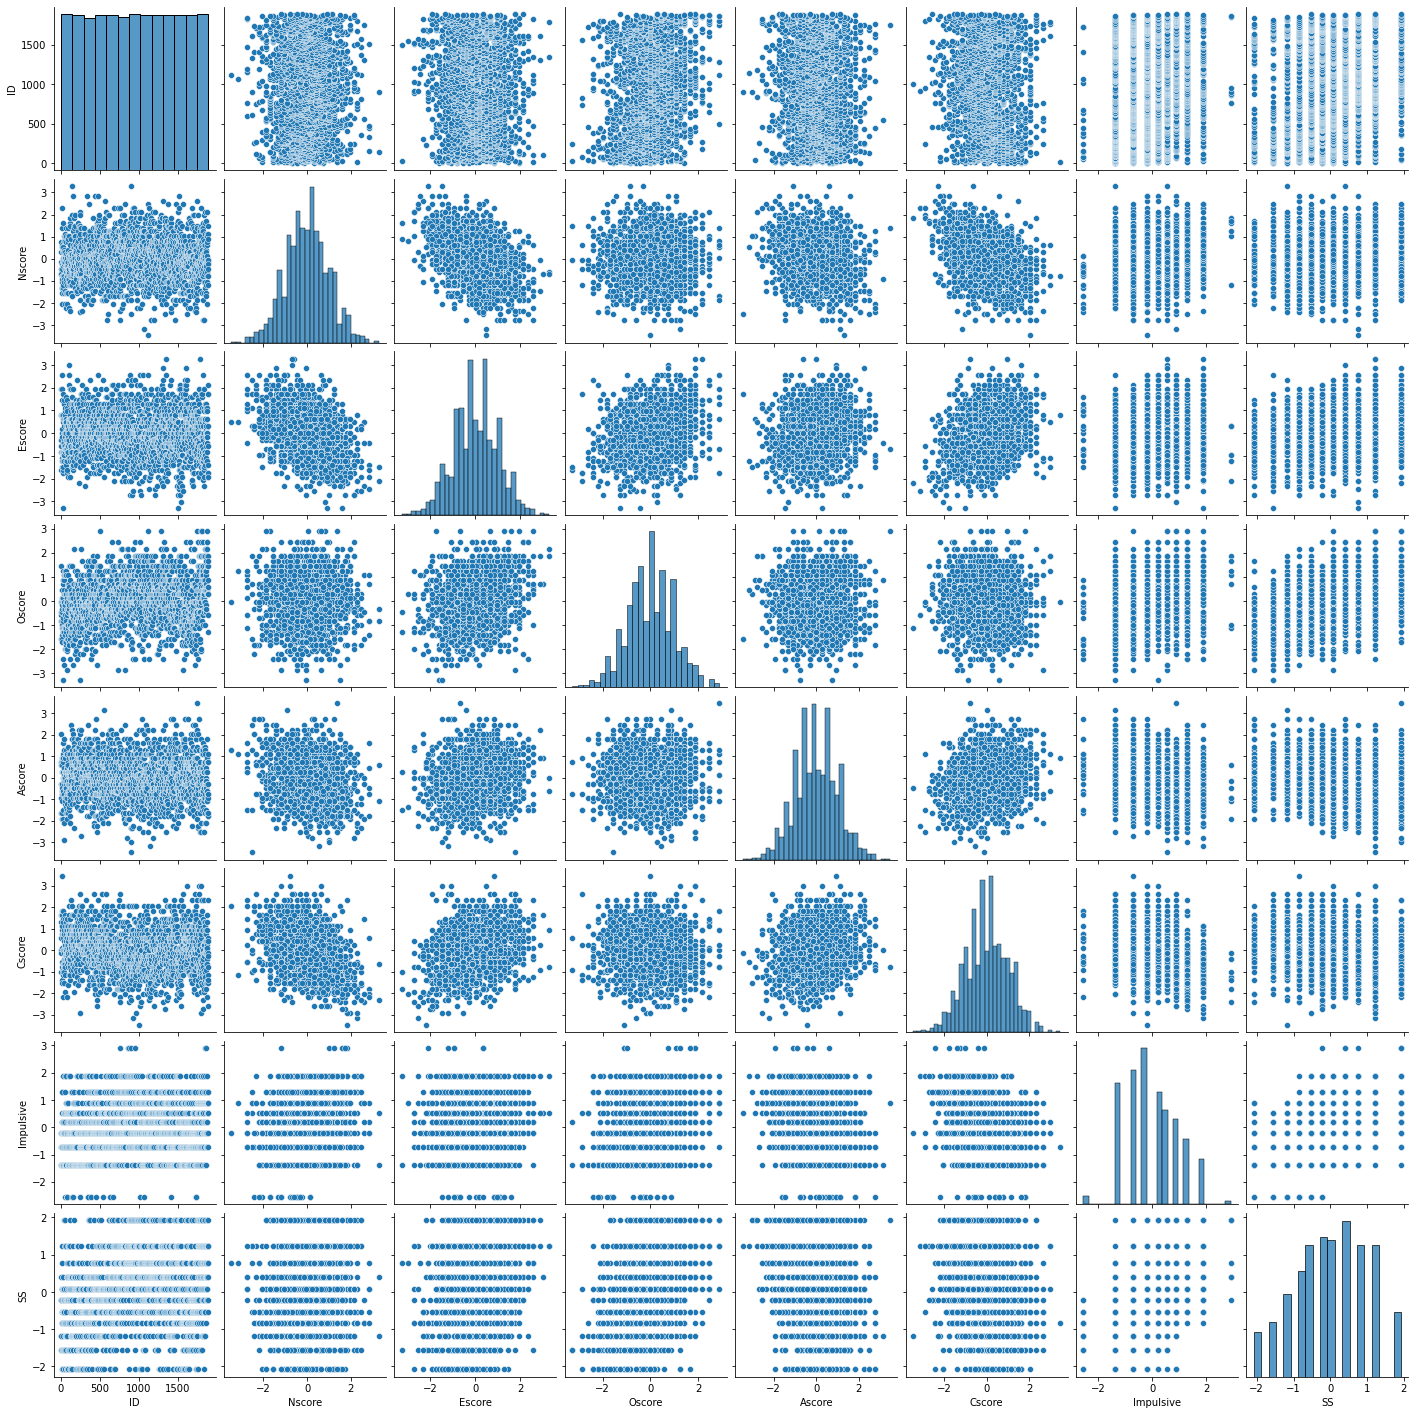

In [56]:
_ =sns.pairplot(df)
#plt.savefig('pairplot.png')

/Users/david/opt/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: '35-44'

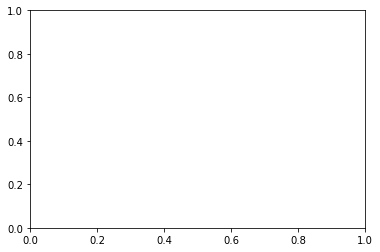

In [73]:
sns.distplot(df2);

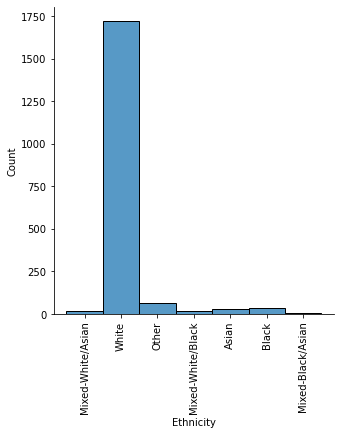

In [78]:
sns.displot(df.Ethnicity)
plt.xticks(rotation=90);

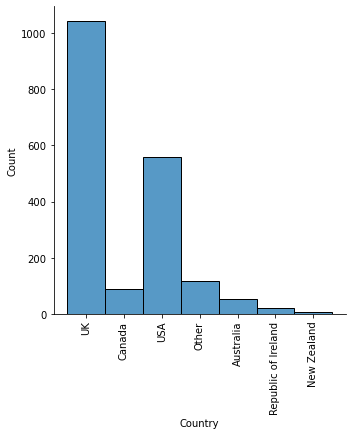

In [79]:
sns.displot(df.Country)
plt.xticks(rotation=90);

/Users/david/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/david/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/david/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/david/opt/anaconda3/envs/nf/lib

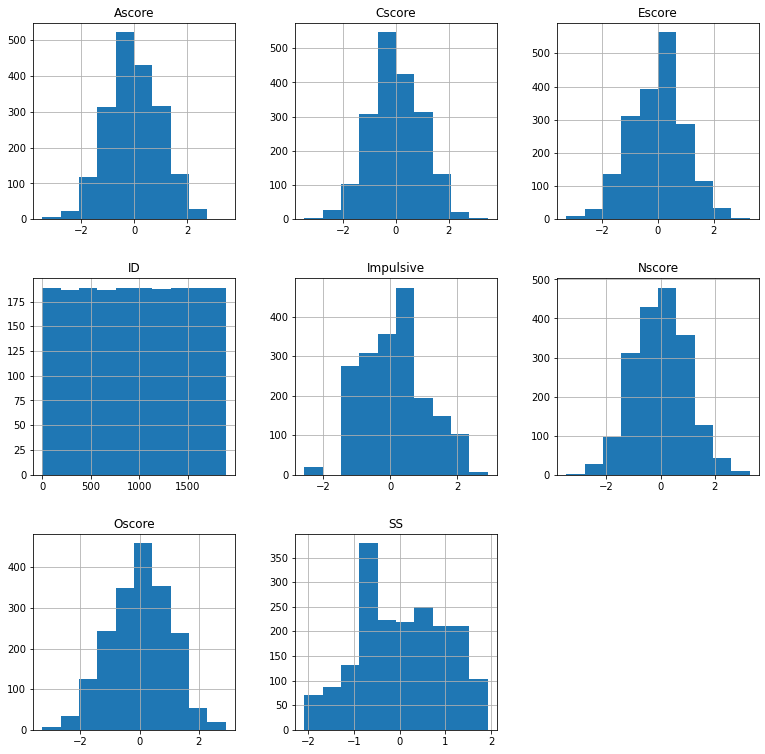

In [61]:
_ = df.hist(figsize=(13,13))